# Gamma and Beta Distributions

So we have now met the following distributions.

For Discrete Distributions we learned that they can be specified by giving the probability distribution for each of the valid outputs. We met a few named distributions that cover common situations and also have sufficient structure that exact computations are possible:  Uniform Distribution, Bernouli Ditribution, Binomial Distribution, Geometric Distribution, and the Poisson Distribution. Note that the support of the Binomial Distribution is 0, 1, 2, ... n; the support of the Geometric and Poisson distributions are 0, 1, 2, ....

For Continuous Distributions we can specify them by giving the Cummulative Distribution Function or its derivative the Proability Density Function. We have met two named distributions again either they have enough structure that we can give exact answers or they fit common situations:  The uniform distribution, and the normal distribution. 

The uniform distribution has compact support on an interval $[a, b]$, while the nomral distribution has support on all real numbers. Note even so, provided $\sigma^2$ is small enough the likliehood that a normal distribution will return values far from $\mu$ is limited. 

However its not hard to imagine a probability distribution with other types of support. 

*Motivating Question*: Consider our Poisson Process from before. For example at a super market where on average 0.9 customers get in line at one of the checkout counters every minute. This fits our requirements for being a Poisson Process and so we expect the distribution of $N$ the number of customers that get in line each minute to fit our Poisson distribution:

$$ P(N= r) = \frac{0.9^r}{r!} e^{-0.9} $$


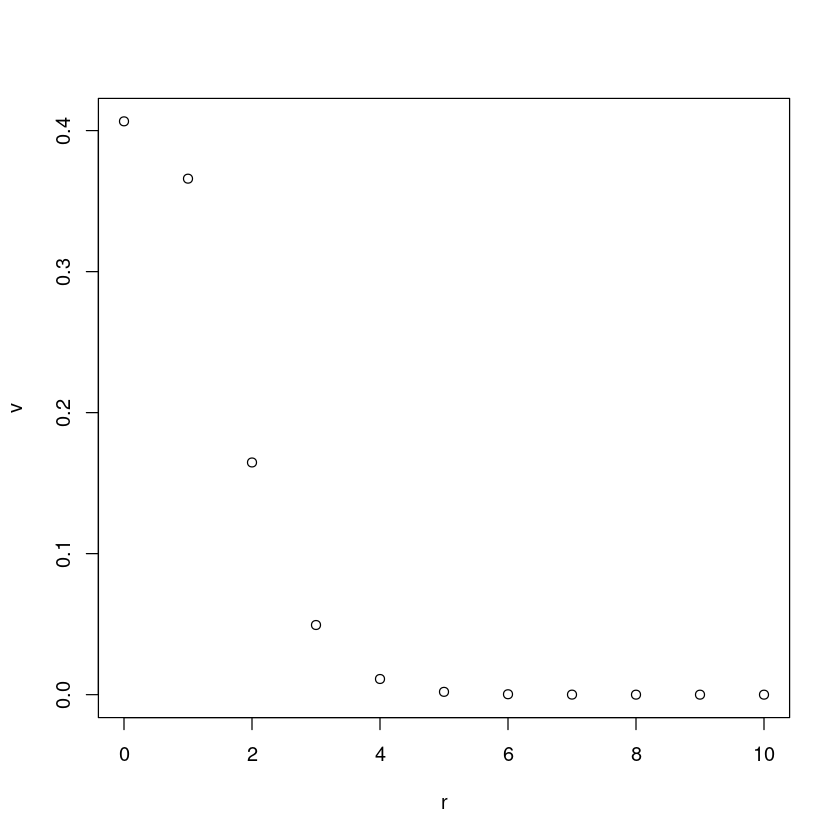

In [1]:
r <- c(0:10)
v <- dpois(r, 0.9)
plot(r, v)

## Exponential Distribution

A rather obvious question then is: after a customer gets in line, how many minutes $Y$ will it be before the next customer gets in line. What will the support of $Y$ be? Let's answer this for a general $\lambda$ and then set $\lambda = 0.9$.

To find a description for this distribution, lets consider what the cummulative distribution function looks like: Define $F(t) = P(Y\leq t) = \mbox{what is the probability that the next customer will appear within $t$ minutes}$

$$ P(Y \leq t ) = 1 - P(Y > t) $$

We can think of $P(Y>t)$ as the probability that in the time interval $[0, t]$ the Poisson process has not had a single event happen (no customer has been in line). If t=1 this is just 

$$ P(Y > 1) = P(N = 0) = e^{-\lambda} $$

Then notice that  

$$ P(Y > n) = P(N=0)^n = e^{-n \lambda) $$

and from here its not hard to convince yourself that 

$$ P( Y > t) = e^{-t \lambda} $$

We could even change the units and measure $t$ in seconds evne though $\lambda$ is in customers/minute.
Thus we have the CDF for our wait time until the first customer:

$$ F(t) = P( Y \leq t ) = 1 - e^{-t \lambda} $$

Differentiating this with respect to $t$ we get the PDF:

$$ f(t) = \lambda e^{-t \lambda} $$

This is called the **Exponential Distribution**:







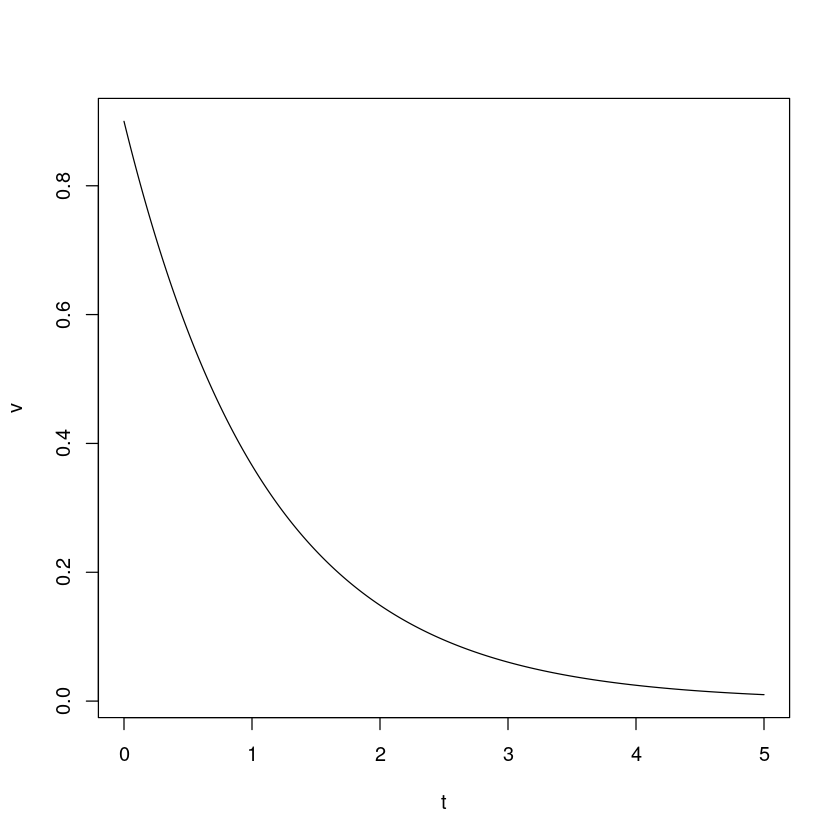

In [2]:
n <- 100
t <- c(0:(n*5))/n
v <- dexp(t, 0.9)
plot(t, v, type='l')

### Expected Value and Variance

The exponential distribution is a joy to work with - integrals are easily found using techniques from Calculus 2. For example the expected value:

$$ E(Y) = \int_0^\infty t \lambda e^{-t\lambda) dt = \frac{1}{\lambda} $$

Likewise:

$$ V(Y) = E(Y^2) - \frac{1}{\lambda^2} $$

With

$$ E(Y^2) = \int_0^\infty t^2 \lambda e^{-t\lambda) dt = \frac{2}{\lambda^2} $$

giving us

$$ V(Y) = \frac{1}{\lambda^2} $$

### When will the next customer arrive 95% of the time?

Find $a$ such that $P(Y < a) = 0.95$. 

The R command *qexp* gives the inverse exponential CDF. Using this we can find?

In [3]:
qexp(0.95, 0.9)

[1] 3.328591

We can check this result by putting it through the CDF function itself:

In [4]:
pexp(3.3286, 0.9)

[1] 0.9500004

### Effect of $\lambda$

As we increase $\lambda$, increasing the number of customers that arrive per minute, what should happen to the random variable $Y$?